#****1. Installing and importing the libraries needed to build this model.****








In [1]:
# Installing the libraries needed to build the model
!pip install --target=$nb_path  rasterio
!pip install pystac
!pip install fsspec
!pip install xarray
!pip install tqdm
!pip install pystac-client
!pip install planetary-computer
!pip install adlfs
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.1/207.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.0/407.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.

#### This code brings the libraries needed




In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd

# Multi-dimensional arrays and datasets
import xarray as xr

# Geospatial data analysis
import geopandas as gpd

# Geospatial operations
!pip install rasterio
import rasterio


# Feature Engineering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Others
import os
from tqdm import tqdm

#****2. Opening the Data files****

In [3]:
# Load the training data from csv file and display the first five rows to inspect the data
train_data = pd.read_csv("Training_Data.csv")
train_data.head()

,Latitude,Longitude,Occurrence Status
0,-34.027900,150.771000,1
1,-34.821595,147.193697,1
2,-36.617759,146.882941,0
3,-37.470900,144.744000,1
4,-38.400153,145.018560,1


In [4]:
# Load multi-band raster (.tiff) file using rasterio
tiff_path = "TerraClimate_output_all.tiff"

# Open the raster file
with rasterio.open(tiff_path) as src1:

  # Read each of the 14 climate variables
    variable1 = src1.read(1)
    variable2 = src1.read(2)
    variable3 = src1.read(3)
    variable4 = src1.read(4)
    variable5 = src1.read(5)
    variable6 = src1.read(6)
    variable7 = src1.read(7)
    variable8 = src1.read(8)
    variable9 = src1.read(9)
    variable10 = src1.read(10)
    variable11 = src1.read(11)
    variable12 = src1.read(12)
    variable13 = src1.read(13)
    variable14 = src1.read(14)


In [5]:

def map_satellite_data(tiff_path, csv_path):
    df = pd.read_csv(csv_path)

    # Open the GeoTIFF file and load data into xarray DataArrays
    with rasterio.open(tiff_path) as dataset:
        # Read raster variables into numpy arrays
        tmax_data = dataset.read(1)
        tmin_data = dataset.read(2)
        vap_data = dataset.read(3)
        ppt_data = dataset.read(4)
        srad_data = dataset.read(5)
        ws_data = dataset.read(6)
        aet_data = dataset.read(7)
        pet_data = dataset.read(8)
        q_data = dataset.read(9)
        def_data = dataset.read(10)
        soil_data = dataset.read(11)
        swe_data = dataset.read(12)
        pdsi_data = dataset.read(13)
        vpd_data = dataset.read(14)

        # Generate coordinate grids (lon/lat) from raster bounds and resolution
        lon = np.linspace(dataset.bounds.left, dataset.bounds.right, dataset.width)
        lat = np.linspace(dataset.bounds.top, dataset.bounds.bottom, dataset.height)

        # Create xarray DataArrays for each variable
        data_vars = {
            "tmax": tmax_data, "tmin": tmin_data, "vap": vap_data, "ppt": ppt_data,
            "srad": srad_data, "ws": ws_data, "aet": aet_data, "pet": pet_data,
            "q": q_data, "def": def_data, "soil": soil_data, "swe": swe_data,
            "pdsi": pdsi_data, "vpd": vpd_data
        }

        data_arrays = {
            var: xr.DataArray(data, coords=[("lat", lat), ("lon", lon)], dims=["lat", "lon"])
            for var, data in data_vars.items()
        }

    # Initialize lists to store extracted values for each variable
    extracted_values = {var: [] for var in data_vars.keys()}

    # Extract values for each row in the DataFrame
    for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Extracting raster values"):
        target_lat, target_lon = row["Latitude"], row["Longitude"]

        for var, da in data_arrays.items():
            try:
                extracted_values[var].append(
                    da.sel(lat=target_lat, lon=target_lon, method="nearest").values
                )
            except KeyError:
                extracted_values[var].append(np.nan)

    # Create a DataFrame to store all extracted variable values
    df_extracted = pd.DataFrame(extracted_values)

    return df_extracted


In [6]:
# Mapping satellite data with training data.
map_data = map_satellite_data('TerraClimate_output_all.tiff', 'Training_Data.csv')
map_data = map_data.astype(float)

Extracting raster values: 100%|██████████| 6312/6312 [00:54<00:00, 115.92it/s]


In [7]:
#Display first 5 rows.
map_data.head(5)

,tmax,tmin,vap,ppt,srad,ws,aet,pet,q,def,soil,swe,pdsi,vpd
0,23.900000,12.599999,1.233,49.7,200.799149,3.6,53.500000,115.500000,2.5,65.300003,16.700001,0.0,-4.5,0.81
1,24.500000,10.900000,0.942,25.9,218.403992,3.1,24.700001,144.699997,1.3,110.900002,2.500000,0.0,-3.9,1.33
2,21.400000,8.099999,0.942,69.9,204.000031,3.2,51.299999,115.099998,3.5,28.200001,68.800003,0.0,-3.8,0.78
3,20.199999,8.000000,0.951,45.0,204.400146,4.4,41.000000,120.700005,2.3,67.300003,11.300000,0.0,-4.7,0.70
4,18.900000,9.900000,1.096,71.1,189.203964,5.6,58.900002,109.500000,3.6,29.500000,43.000000,0.0,-4.8,0.50


In [8]:
map_data.shape

(6312, 14)

In [9]:
# Combine two datasets vertically (along columns) using pandas concat function.
def combine_two_datasets(dataset1,dataset2):
    data = pd.concat([dataset1,dataset2], axis=1)
    return data

In [10]:
# Combining ground data and final data into a single dataset.
combined = combine_two_datasets(train_data,map_data)
combined.head()
combined.shape

(6312, 17)

In [11]:
# Retaining all the data columns except for the longitude and latitude.
initial_data=combined.loc[:, ['tmax', 'tmin', 'vap', 'ppt', 'srad', 'ws', 'aet', 'pet','swe',
                    'q', 'def', 'soil',  'pdsi', 'vpd', 'Occurrence Status']]
initial_data.describe()

,tmax,tmin,vap,ppt,srad,ws,aet,pet,swe,q,def,soil,pdsi,vpd,Occurrence Status
count,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000,6312.000000
mean,21.773526,9.288134,1.012568,47.162722,206.006832,3.875939,42.468949,120.981640,0.000111,2.426061,66.832225,22.674858,-4.205925,0.823176,0.600760
std,2.713661,2.256942,0.133697,18.748566,12.158110,0.777709,14.310979,16.712783,0.005486,1.285706,35.670742,31.136363,0.781642,0.331247,0.489781
min,10.000000,0.900000,0.564000,10.100000,177.800842,2.600000,9.600000,78.599998,0.000000,0.500000,0.000000,0.300000,-6.500000,0.280000,0.000000
25%,19.799999,7.700000,0.938000,34.000000,197.374191,3.200000,33.200001,109.074999,0.000000,1.700000,40.299999,3.200000,-4.700000,0.580000,0.000000
50%,21.299999,9.200000,0.982000,45.000000,204.048042,3.700000,42.500000,116.099998,0.000000,2.300000,61.400002,11.900001,-4.400000,0.700000,1.000000
75%,23.699999,10.800000,1.062000,59.025000,215.203110,4.300000,51.799999,130.199997,0.000000,3.000000,90.599998,28.700001,-3.800000,0.980000,1.000000
max,28.199999,14.799999,1.468000,127.800000,236.496948,7.050000,96.599998,164.699997,0.400000,23.900000,148.400009,210.900009,-2.300000,1.730000,1.000000


#****3. Data Proprecessing and Feature Selection****

In [12]:
# Data correlation to figure out the relationship among the variables.
initial_data.corr()

,tmax,tmin,vap,ppt,srad,ws,aet,pet,swe,q,def,soil,pdsi,vpd,Occurrence Status
tmax,1.000000,0.754444,0.236504,-0.670887,0.748542,-0.569643,-0.581266,0.864027,-0.084529,-0.619196,0.788262,-0.508234,0.294749,0.906401,-0.215668
tmin,0.754444,1.000000,0.760914,-0.274052,0.258761,-0.136761,-0.070970,0.464603,-0.073610,-0.323703,0.385795,-0.285631,-0.004764,0.496298,0.021243
vap,0.236504,0.760914,1.000000,0.190873,-0.305833,0.290363,0.444299,-0.100203,-0.066260,0.037645,-0.136238,0.012703,-0.211310,-0.131277,0.236500
ppt,-0.670887,-0.274052,0.190873,1.000000,-0.702323,0.452453,0.884535,-0.750963,0.079998,0.871658,-0.904777,0.806890,-0.452786,-0.728061,0.310686
srad,0.748542,0.258761,-0.305833,-0.702323,1.000000,-0.658739,-0.738605,0.809345,-0.041040,-0.575692,0.808141,-0.518222,0.495382,0.884739,-0.282351
ws,-0.569643,-0.136761,0.290363,0.452453,-0.658739,1.000000,0.460761,-0.425173,0.052993,0.394007,-0.424463,0.355762,-0.104756,-0.584480,0.199978
aet,-0.581266,-0.070970,0.444299,0.884535,-0.738605,0.460761,1.000000,-0.766842,0.034901,0.716767,-0.862998,0.622919,-0.479556,-0.754971,0.358201
pet,0.864027,0.464603,-0.100203,-0.750963,0.809345,-0.425173,-0.766842,1.000000,-0.049009,-0.627530,0.898059,-0.478254,0.451791,0.944229,-0.296749
swe,-0.084529,-0.073610,-0.066260,0.079998,-0.041040,0.052993,0.034901,-0.049009,1.000000,0.107426,-0.037882,0.049285,0.020108,-0.032632,0.010584
q,-0.619196,-0.323703,0.037645,0.871658,-0.575692,0.394007,0.716767,-0.627530,0.107426,1.000000,-0.748281,0.753845,-0.296435,-0.593723,0.237681


In [15]:
from scipy.stats import zscore

def remove_outliers_z(df, columns=None):
    """
    Removes outliers from a DataFrame using the Z-score method.

    Parameters:
        df (pd.DataFrame): Input DataFrame containing numerical columns.
        columns (list, optional): Not used in current version, placeholder for future column selection.

    Returns:
        df_no_outliers (pd.DataFrame): DataFrame with rows containing Z-scores > threshold removed.
    """

    # Select only numeric columns from the DataFrame
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # Calculate Z-scores for all numeric columns
    z_scores = df[numeric_cols].apply(zscore)

    # Define the Z-score threshold (commonly 3)
    threshold = 3

    # Filter rows: keep only rows where all Z-scores are within the threshold
    df_no_outliers = df[(np.abs(z_scores) < threshold).all(axis=1)]

    return df_no_outliers


### **Feature selection based on domain knowledge and correlation**

In [16]:
# All: ['tmax', 'tmin', 'vap', 'ppt', 'srad', 'ws', 'pet', 'q', 'def', 'soil',  'pdsi', 'vpd', 'Occurrence Status']
#new_model = initial_data.loc[:, ['tmax', 'tmin', 'ppt', 'ws', 'q', 'soil', 'vpd', 'pet','Occurrence Status']]# 0.8220 best
#new_model = initial_data.loc[:, ['def', 'tmin', 'ppt', 'ws', 'q', 'soil', 'vpd', 'pet','Occurrence Status']] # 0.8220 best
#new_model = initial_data.loc[:, ['tmax', 'def', 'ppt', 'ws', 'q', 'soil', 'vpd', 'pet','Occurrence Status']] # 0.8248
new_model = initial_data.loc[:, ['tmax', 'def', 'ppt', 'ws', 'q', 'soil', 'vpd', 'pet','Occurrence Status']]

# Removing the outliers
new_model = remove_outliers_z(new_model)
map_data = map_data.astype(float)

In [17]:
# Checking the data size
print(initial_data.shape)
print(new_model.shape)

(6312, 15)
(6043, 9)


In [18]:
# Checking the data imbalance.
new_model['Occurrence Status'].value_counts()

,count
Occurrence Status,
1,3608
0,2435


# **4. Data Modeling**

# **Candidate 1)**
*   ### **LightBGM f1 score: 0.82**
*   ### **LightBGM test accuracy: 0.8248**



In [19]:
# Install the libraries
!pip install lightgbm
!pip install imblearn

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# 1. Split features (X) and target (y)
X = new_model.drop(columns=['Occurrence Status'])  # Features
y = new_model['Occurrence Status']                # Target label (binary: 0 or 1)

# 2. Print class distribution before oversampling
print("Before sampling", y.value_counts(normalize=True))

# 3. Apply RandomOverSampler to address class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# 4. Check class distribution after oversampling
print("After sampling", y_resampled.value_counts(normalize=True))

# 5. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# 6. Define the LightGBM classifier with hyperparameters
model = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    random_state=42,
    n_estimators=200,
    learning_rate=0.1,
    num_leaves=40,
    max_depth=10,
    min_child_samples=10,
    colsample_bytree=0.6,
    reg_alpha=0.3,
    reg_lambda=0.1,
    class_weight='balanced'
)

# 7. Train the model
model.fit(X_train, y_train)

# 8. Predict and evaluate on training data
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)
print(f"\nTraining Accuracy: {accuracy_train:.4f}")
print("\nTraining Classification Report:\n", report_train)

# 9. Predict and evaluate on test data
y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
print(f"\nTest Accuracy: {accuracy_test:.4f}")
print("\nTest Classification Report:\n", report_test)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.7 MB/s eta 0:00:00
Before sampling Occurrence Status
1    0.597054
0    0.402946
Name: proportion, dtype: float64
After sampling Occurrence Status
1    0.5
0    0.5
Name: proportion, dtype: float64
[LightGBM] [Info] Number of positive: 2888, number of negative: 2884
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1463
[LightGBM] [Info] Number of data points in the train set: 5772, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

# **Candidate 2)**
*   ### **XGBoost f1 score: 0.83**
*   ### **XGBoost test accuracy: 0.8296**

In [21]:
# Install XGBoost if not already installed

!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Define the XGBoost classifier with tuned hyperparameters
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=8,
    n_estimators=200,
    learning_rate=0.1,
    random_state=42,
    reg_alpha=0.3,
    reg_lambda=0.1,
)

# 2. Train the model
model.fit(X_train, y_train)

# 3. Predict and evaluate on training set
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)
print(f"\nTraining Accuracy: {accuracy_train:.4f}")
print("\nTraining Classification Report:\n", report_train)

# 4. Predict and evaluate on test set
y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
print(f"\nTest Accuracy: {accuracy_test:.4f}")
print("\nTest Classification Report:\n", report_test)




Training Accuracy: 0.9494

Training Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2884
           1       0.95      0.95      0.95      2888

    accuracy                           0.95      5772
   macro avg       0.95      0.95      0.95      5772
weighted avg       0.95      0.95      0.95      5772


Test Accuracy: 0.8296

Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       724
           1       0.82      0.84      0.83       720

    accuracy                           0.83      1444
   macro avg       0.83      0.83      0.83      1444
weighted avg       0.83      0.83      0.83      1444



# **Candidate 3)**
*   ### **ExtraTrees f1 score: 0.83**
*   ### **ExtraTrees test accuracy: 0.8310**

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

# 1. Define the ExtraTreesClassifier with specified hyperparameters
final_model = ExtraTreesClassifier(
    n_estimators=210,
    criterion='entropy',
    max_depth = 27,
    bootstrap=True,
    random_state=42,
    min_samples_split = 2,
    class_weight='balanced'
)

# 2. Train the model
final_model.fit(X_train, y_train)

# 3. Predict and evaluate on training data
y_pred_train = final_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)
print(f"\nTraining Accuracy: {accuracy_train:.4f}")
print("\nTraining Classification Report:\n", report_train)

# 4. Predict and evaluate on test data
y_pred_test = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
print(f"\nTest Accuracy: {accuracy_test:.4f}")
print("\nTest Classification Report:\n", report_test)



Training Accuracy: 0.9653

Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      2884
           1       0.96      0.97      0.97      2888

    accuracy                           0.97      5772
   macro avg       0.97      0.97      0.97      5772
weighted avg       0.97      0.97      0.97      5772


Test Accuracy: 0.8310

Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       724
           1       0.84      0.82      0.83       720

    accuracy                           0.83      1444
   macro avg       0.83      0.83      0.83      1444
weighted avg       0.83      0.83      0.83      1444



# **Among the candidate, the ExtraTreesClassifier shows the strongest f1 score. So we decided this model as the final model.**

<p align="justify">In this section, we make predictions on the training set and store them in the <b><i>insample_predictions</i></b> variable. The classification report is then calculated to evaluate the model's performance on the training data, providing metrics like precision, recall, F1-score, and accuracy. It is important to keep in mind that this evaluation is for the training set, and further testing on the test set is necessary to assess the model's generalizability.</p>

In [39]:
# Make predictions on the training data
insample_predictions = final_model.predict(X_train)
print(classification_report(y_train,insample_predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2884
           1       0.96      0.97      0.97      2888

    accuracy                           0.97      5772
   macro avg       0.97      0.97      0.97      5772
weighted avg       0.97      0.97      0.97      5772



### Confusion matrix of train data

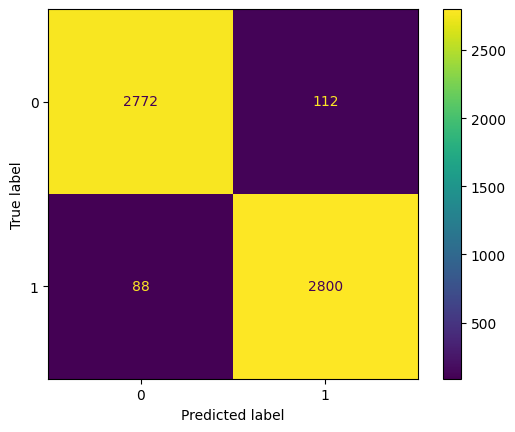

In [25]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Display confusion matrix.
ConfusionMatrixDisplay(confusion_matrix(y_train,insample_predictions)).plot()

### Out-Sample Evaluation

<p align="justify">When evaluating a machine learning model, it is crucial to assess its ability to generalize accurately. This is because models often tend to overfit the data they are trained on. To estimate the model's out-of-sample performance, we will now make predictions on the test data.</p>

In [40]:
# Make predictions and evaluate performance
outsample_predictions=final_model.predict(X_test)
print(classification_report(y_test,outsample_predictions))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       724
           1       0.84      0.82      0.83       720

    accuracy                           0.83      1444
   macro avg       0.83      0.83      0.83      1444
weighted avg       0.83      0.83      0.83      1444



### Confusion matrix of test data

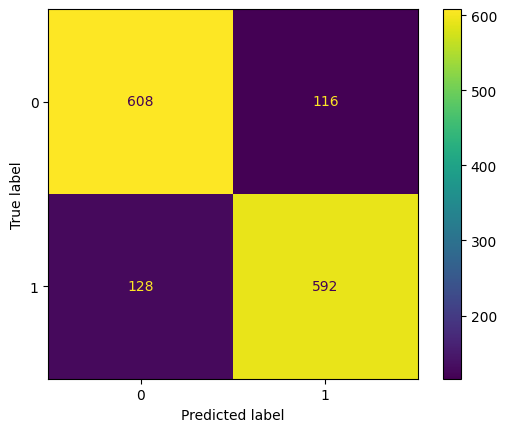

In [27]:
# Display confusion matrix.
ConfusionMatrixDisplay(confusion_matrix(y_test,outsample_predictions)).plot()

## Model Validation on a New Location

<p align="justify">Once you are satisfied with your model, you can validate the model on the dataset of a different location. To do this, use your model to predict the frog occurrence status for a set of test coordinates provided in the <b>"Validation_template.csv"</b> file and share the predicted results to the instructor/professor.</p>

In [28]:
#Reading the coordinates for the validation dataset
test_file = pd.read_csv('Validation_Template.csv')
test_file.head()

,Latitude,Longitude
0,-33.121788,150.320746
1,-36.592011,148.172262
2,-35.455100,146.693465
3,-33.076261,149.547177
4,-35.529729,146.627272


In [29]:
# check dataframe shape
test_file.shape

(2000, 2)

In [30]:
# Mapping satellite data with test data.
final_val_data = map_satellite_data('TerraClimate_output_all.tiff', 'Validation_Template.csv')
final_val_data = final_val_data.astype(float)

Extracting raster values: 100%|██████████| 2000/2000 [00:17<00:00, 116.78it/s]


In [31]:
final_val_data = final_val_data.apply(pd.to_numeric, errors='coerce')

In [32]:
# Display first 5 rows
final_val_data.describe()

,tmax,tmin,vap,ppt,srad,ws,aet,pet,q,def,soil,swe,pdsi,vpd
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,22.014850,9.558550,1.026846,47.003450,206.610285,3.842995,43.001301,122.026552,2.389250,68.103051,21.158550,0.000550,-4.190550,0.840340
std,2.742691,2.370301,0.148485,19.095841,11.979844,0.746026,15.799845,17.081514,1.118398,36.411430,28.458868,0.014311,0.745428,0.336339
min,10.000000,0.900000,0.564000,10.200000,178.096924,2.700000,9.700000,78.599998,0.500000,0.000000,0.300000,0.000000,-6.500000,0.280000
25%,19.900000,7.700000,0.939000,33.075000,197.998383,3.200000,31.775001,110.000000,1.675000,40.299999,2.900000,0.000000,-4.600000,0.590000
50%,21.600000,9.500000,0.986000,45.200000,204.296112,3.700000,42.750000,117.450001,2.300000,62.000000,11.900001,0.000000,-4.400000,0.710000
75%,23.900000,11.400000,1.073000,59.900000,215.299133,4.300000,52.799999,132.100006,3.000000,94.850002,29.200001,0.000000,-3.800000,1.010000
max,28.199999,14.299999,1.468000,123.900000,236.600983,7.050000,96.599998,165.500000,14.300000,148.900009,216.400009,0.400000,-2.400000,1.720000


In [33]:
features = ['tmax', 'def', 'ppt', 'ws', 'q', 'soil', 'vpd', 'pet']
target = 'Occurrence Status'

# scaler = StandardScaler()
# final_val_data[features] = scaler.fit_transform(final_val_data[features])

In [41]:
# Loading the trained model and predict on validation data.
final_predictions = final_model.predict(final_val_data[features])
final_prediction_series = pd.Series(final_predictions)

In [42]:
#Combining the results into dataframe
submission_df = pd.DataFrame({'Latitude':test_file['Latitude'].values, 'Longitude':test_file['Longitude'].values,  'Occurrence Status':final_prediction_series.values})

In [43]:
#Displaying the dataframe
display(submission_df)

,Latitude,Longitude,Occurrence Status
0,-33.121788,150.320746,1
1,-36.592011,148.172262,0
2,-35.455100,146.693465,0
3,-33.076261,149.547177,1
4,-35.529729,146.627272,0
...,...,...,...
1995,-33.342761,145.736478,0
1996,-34.455690,150.442003,1
1997,-36.241444,144.720379,1
1998,-32.194000,148.900320,1


In [37]:
#Dumping the predictions into a csv file.
submission_df.to_csv("Predicted_Data.csv",index = False)